In [2]:
from google.colab import files

# This will prompt you to upload the smmh.csv file from your local system
uploaded = files.upload()



Saving smmh.csv to smmh.csv


In [3]:
#Import the associated library
import pandas as pd

# Upload the specific dataset
datos = pd.read_csv('smmh.csv')  # Usando el nombre del archivo directamente


In [4]:
#Print the names of the columns that are asssocciated
print(datos.columns)


Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

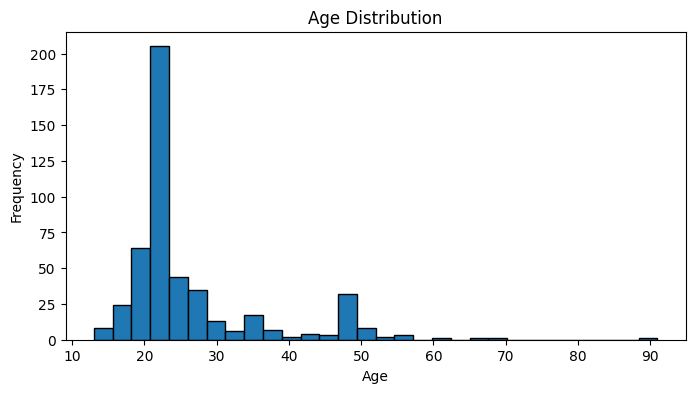

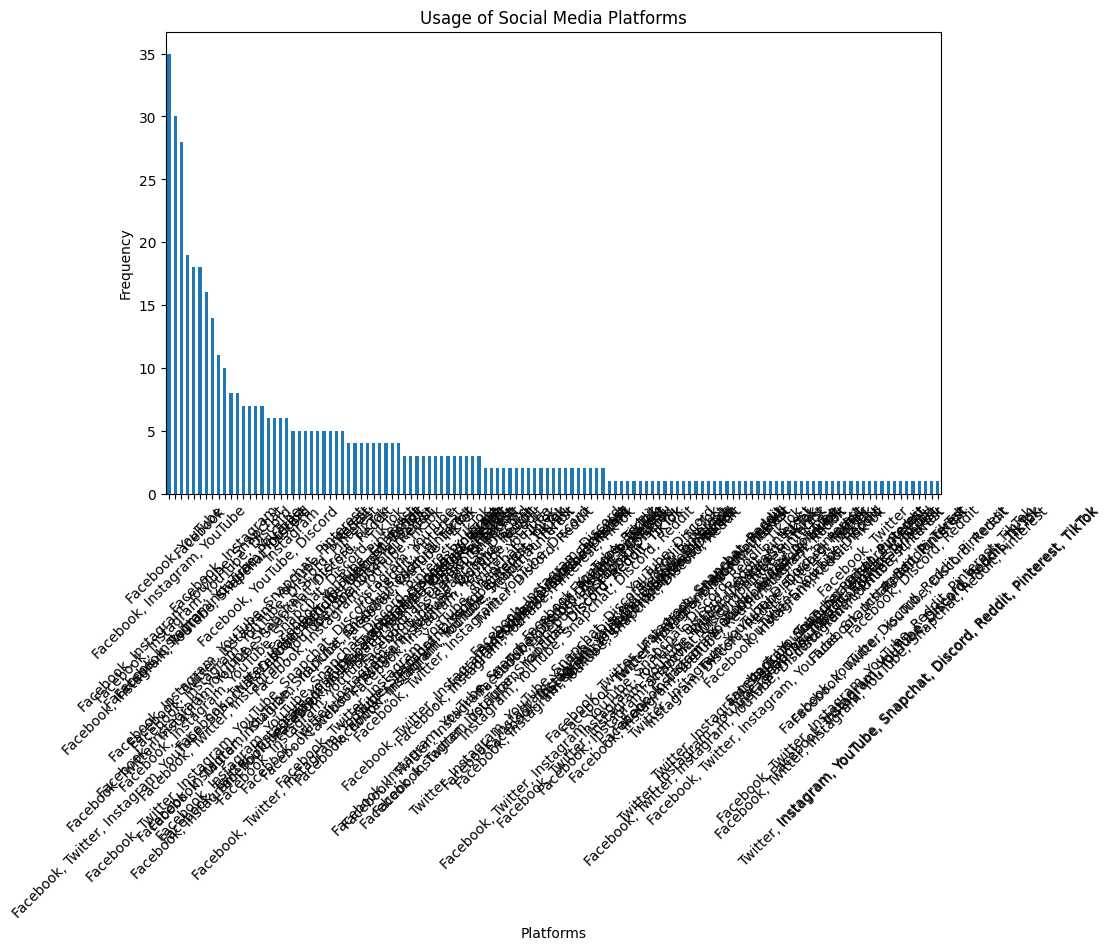

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Reads the CSV file located at the specified path into a DataFrame.
# This DataFrame, 'datos', now contains all the data from the 'smmh.csv' file.
datos = pd.read_csv('smmh.csv')

# Print the column names and the first few rows to verify the data
# This helps in understanding the structure of the data, ensuring that it has loaded correctly.
print(datos.columns)
print(datos.head())

# Basic data cleaning
# Converts the 'Timestamp' column to datetime type.
# The 'errors='coerce'' argument converts any non-convertible values into NaT (Not a Time).
datos['Timestamp'] = pd.to_datetime(datos['Timestamp'], format='%Y/%m/%d', errors='coerce')

# Converting text-based numerical responses to numeric types
# A list of columns that are expected to contain numeric values stored as text.
cols_numericas = [
    '1. What is your age?', '8. What is the average time you spend on social media every day?',
    '10. How often do you get distracted by Social media when you are busy doing something?',
    '11. Do you feel restless if you haven\'t used Social media in a while?',
    '12. On a scale of 1 to 5, how easily distracted are you?',
    '13. On a scale of 1 to 5, how much are you bothered by worries?',
    '14. Do you find it difficult to concentrate on things?',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
    '17. How often do you look to seek validation from features of social media?',
    '18. How often do you feel depressed or down?',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?'
]

# Converts each specified column to a numeric type, handling non-numeric values by converting them to NaN.
for col in cols_numericas:
    datos[col] = pd.to_numeric(datos[col], errors='coerce')

# Exploratory Data Analysis
# Age distribution plot
# Plots a histogram of the '1. What is your age?' column.
# The 'dropna()' function removes missing values which can interfere with visualizations.
plt.figure(figsize=(8, 4))
plt.hist(datos['1. What is your age?'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analysis of the usage of different social media platforms
# Plots a bar graph of the counts of responses in '7. What social media platforms do you commonly use?' column.
# The 'value_counts()' function counts unique values in the column.
plt.figure(figsize=(10, 6))
datos['7. What social media platforms do you commonly use?'].value_counts().plot(kind='bar')
plt.title('Usage of Social Media Platforms')
plt.xlabel('Platforms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [6]:
#Random Forest Process: Identify different set of depressions considering frecuency of individuals in depression moments using undefinied categories
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Data Loading
datos = pd.read_csv('smmh.csv')

# Characteristics of preparation based on the objective variable
X = datos.drop(['18. How often do you feel depressed or down?', 'Timestamp'], axis=1)
y = datos['18. How often do you feel depressed or down?'].apply(lambda x: 1 if x > 3 else 0)  # Clasificación binaria

# Data Preprocessing: variables codification based on numerical variables
categorical_features = ['2. Gender', '3. Relationship Status', '4. Occupation Status',
                        '5. What type of organizations are you affiliated with?',
                        '6. Do you use social media?', '7. What social media platforms do you commonly use?']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical analysis on the respective configuration
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline of processing based on a random forest generation
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Data Division in training and deployment test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7319587628865979


In [7]:
#Data visualizacion related with the input analysis generated in the beggining of the code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Load the data from a CSV file into a pandas DataFrame
datos = pd.read_csv('smmh.csv')

# Prepare the features and target variable
# Drop the target column and 'Timestamp' to form the features DataFrame 'X'
# Convert target into a binary format where 1 indicates 'depressed'
X = datos.drop(['18. How often do you feel depressed or down?', 'Timestamp'], axis=1)
y = datos['18. How often do you feel depressed or down?'].apply(lambda x: 1 if x > 3 else 0)

# Preprocessing setup: Encoding categorical variables and scaling numerical variables
categorical_features = ['2. Gender', '3. Relationship Status', '4. Occupation Status',
                        '5. What type of organizations are you affiliated with?',
                        '6. Do you use social media?', '7. What social media platforms do you commonly use?']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up a ColumnTransformer to apply the different transformations to categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline integrating the preprocessor and the Random Forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
pipeline.fit(X_train, y_train)

# Evaluate the model using accuracy metric
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7319587628865979


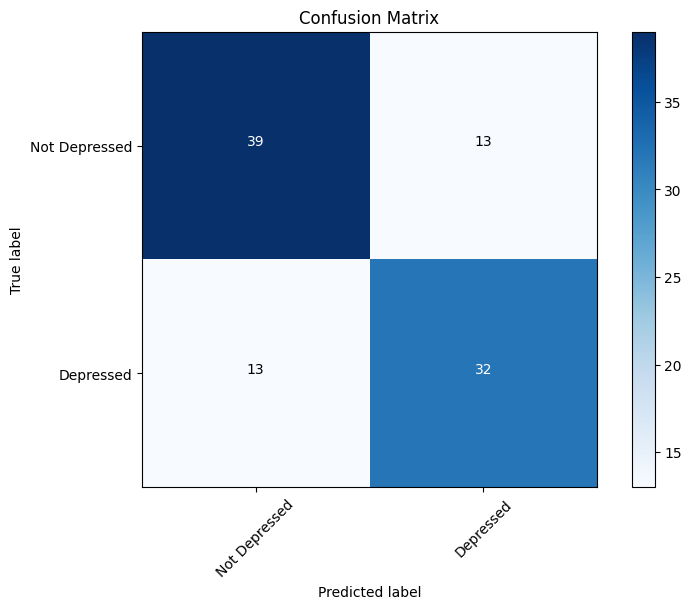

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        52
           1       0.71      0.71      0.71        45

    accuracy                           0.73        97
   macro avg       0.73      0.73      0.73        97
weighted avg       0.73      0.73      0.73        97



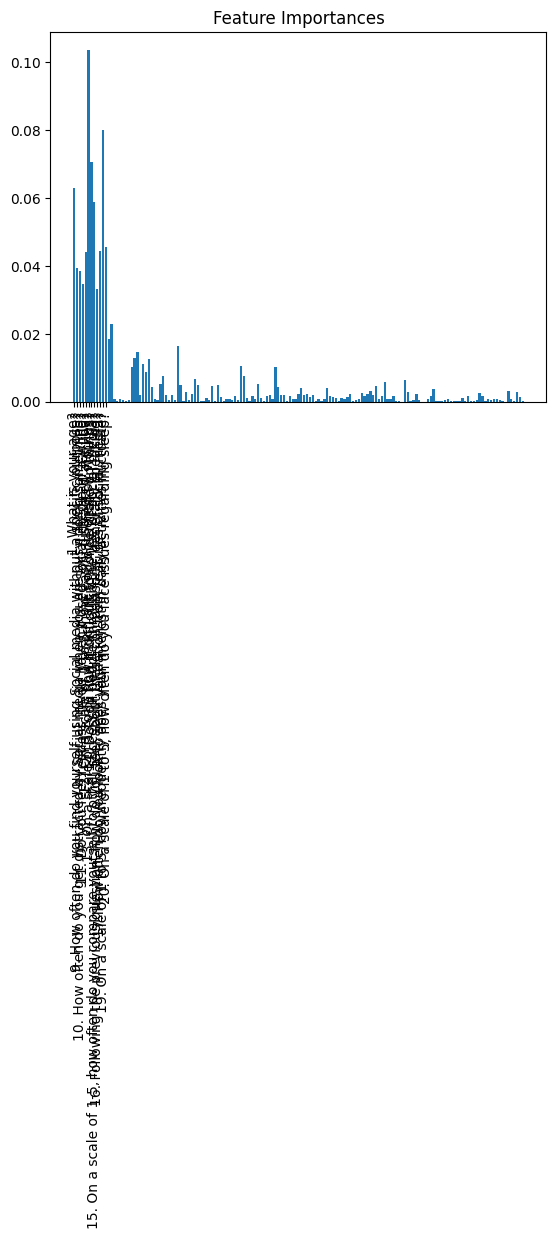

In [8]:
#Data components visualizations
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix analysis deployment
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(['Not Depressed', 'Depressed']))
plt.xticks(tick_marks, ['Not Depressed', 'Depressed'], rotation=45)
plt.yticks(tick_marks, ['Not Depressed', 'Depressed'])

thresh = cm.max() / 2.
# Usando un bucle directo en lugar de itertools.product
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report Data
print(classification_report(y_test, y_pred))

# Importance of the characteristics associated on the dataframe
importances = pipeline.named_steps['classifier'].feature_importances_
features = numeric_features  # Asegúrate de que 'numeric_features' se definan correctamente
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(features)), features, rotation=90)
plt.title('Feature Importances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


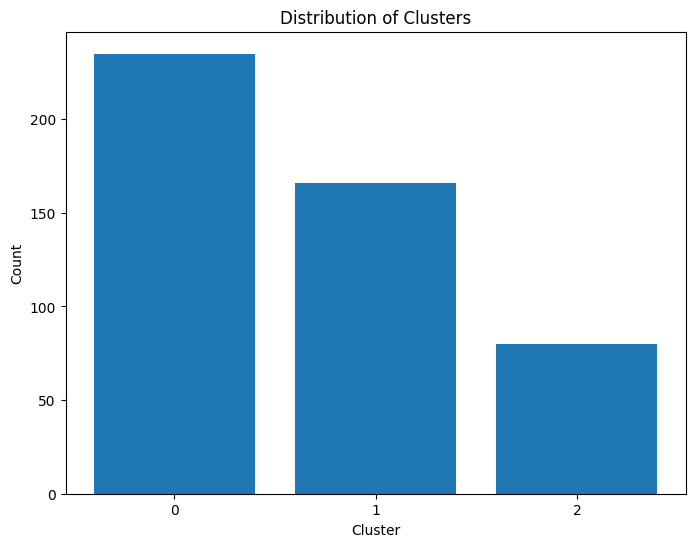

TypeError: Could not convert 4/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/18/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/19/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/20/224/21/224/21/224/21/224/21/224/21/224/21/224/21/224/21/224/21/224/21/224/21/224/21/224/21/224/22/224/22/224/22/224/22/224/26/224/26/224/26/224/26/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/11/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/12/225/13/225/13/225/13/225/13/225/13/225/13/225/13/225/13/225/13/225/13/225/13/225/13/225/13/225/14/225/14/225/14/225/14/225/15/225/16/225/18/225/21/225/21/225/22/225/22/22 to numeric

In [10]:
#Clusterization analysis: Social Media User Clustering Analysis to Identify Behavioral Patterns
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convertion of the specific dataset according to numerical data
def convert_time_to_numeric(x):
    if x == 'Less than 1 hour':
        return 0.5
    elif x == 'Between 1 and 2 hours':
        return 1.5
    elif x == 'Between 2 and 3 hours':
        return 2.5
    elif x == 'Between 3 and 4 hours':
        return 3.5
    elif x == 'Between 4 and 5 hours':
        return 4.5
    elif x == 'More than 5 hours':
        return 5.5
    return 0

# Assume datos is already loaded as DataFrame
# Apply the conversion to the relevant column
datos['8. What is the average time you spend on social media every day?'] = datos['8. What is the average time you spend on social media every day?'].apply(convert_time_to_numeric)

# Assuming definition of features and categorical_features
# Example definition
numeric_features = ['1. What is your age?', '8. What is the average time you spend on social media every day?']
categorical_features = ['2. Gender', '3. Relationship Status']  # Add other categorical feature names

# Preprocessing of numerical and categorical characteristics
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Prepare data for clustering
X_processed = preprocessor.fit_transform(datos)

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as necessary
clusters = kmeans.fit_predict(X_processed)

# Add the cluster assignment to the original data for analysis
datos['Cluster'] = clusters

# Visualize the distribution of the clusters
plt.figure(figsize=(8, 6))
plt.hist(clusters, bins=range(len(set(clusters))+1), align='left', rwidth=0.8)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(range(len(set(clusters))))
plt.show()

# Optional: examine the average features by cluster
print(datos.groupby('Cluster').mean())


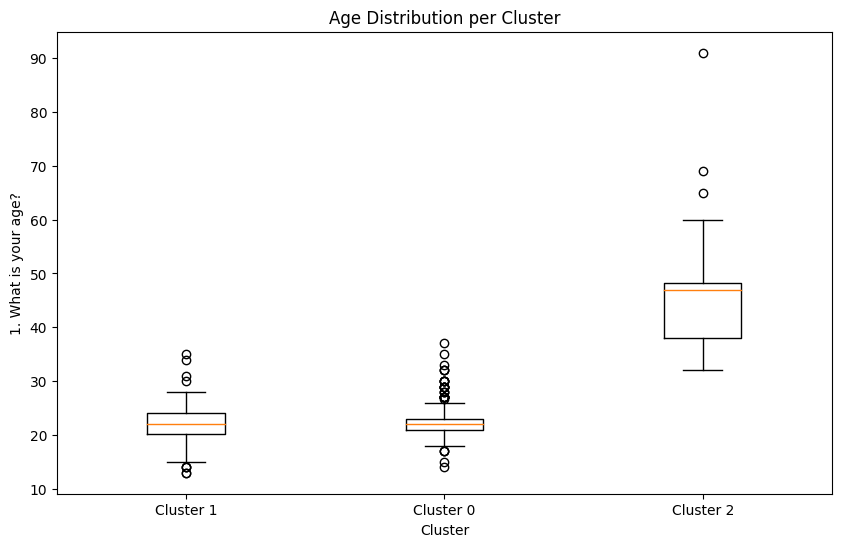

In [13]:
#BoxPlot associated with the distribution of the clusters
import matplotlib.pyplot as plt

# Characteristic of compharison between the specific feature
feature = '1. What is your age?'

# Prepare the data outcome into the boxplot
clusters = datos['Cluster'].unique()
data_to_plot = [datos[datos['Cluster'] == cluster][feature] for cluster in clusters]

#Creation and configuration of the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=[f'Cluster {cluster}' for cluster in clusters])
plt.title('Age Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel(feature)
plt.show()
